
*1. `Бизнес-проблема:`* мы считаем, что конверсии из визита в покупку в нашем магазине недостаточно высоки. Мы посмотрели на страницы конкурентов и поняли, что у нас есть возможность увеличить объем продаж, если мы еще немного изменим дизайн страницы с каталогом продукции.

*2. `Гипотеза:`* предполагается, что добавление видео с процессом приготовления вкусностей мотивирует к их покупке и позволяет добиться двух эффектов:
   * повышение конверсии из визита в оплату (больше людей захотят купить нашу продукцию)
   * как минимум, не снижение среднего чека покупки, а в идеале — увеличение

*3. `Ожидаемые действия пользователей:`* мы ожидаем, что, увидев видео с процессом приготовления вкусностей вместе с описанием продукции, больше людей захотят сделать покупку, а возможно — в среднем будут покупать больше продукции в одном заказе.

*4. `Эксперимент будет считаться успешным, если:`*
   * конверсия из визита в покупку с окном в 7 дней повысится
   * средний чек покупки не снизится


## Что нужно сделать?

Проанализировать данные нового теста и дать свои комментарии о его успешности. Можно ли выкатывать изменение на всех пользователей?

1. Выбрать окно конверсии
2. Исследовать распределение пользователей по группам по основным сегментам
3. Оценить статистическую значимость в изменении конверсии с помощью критерия хи-квадрат
4. Вычислить мощность теста
5. Использовать бутстрап для оценки влияния теста на средний чек
6. Сделать вывод по результатам проведенного теста

## Задание 1. Выбери окно конверсии, используя исторические данные

**1. Прочитай файл investigate_window.csv.**
   - Запиши даннные в переменную `historical_data`

   - Отправь безымянную колонку с нумерацией в индекс с помощью аргумента функции `read_csv()`.

   - Проверь, какой тип данных в каждой колонке, и переведи столбцы с датами в формат даты.

In [ ]:
import pandas as pd

In [ ]:
historical_data = pd.read_csv('investigate_window.csv', index_col=[0], parse_dates=[2,3])

In [ ]:
historical_data

,user_id,main_page_viewed_at,order_completed_at,time_to_order
0,959238,2020-11-20 23:55:02.759000+00:00,2020-11-30 02:22:32.759000+00:00,9.102431
1,337366,2020-12-05 23:41:42.244000+00:00,2020-12-12 22:25:52.244000+00:00,6.947338
2,259956,2020-11-20 23:33:53.269000+00:00,2020-11-25 13:08:03.269000+00:00,4.565394
3,534280,2020-11-28 23:44:56.556000+00:00,2020-12-05 10:14:06.556000+00:00,6.436921
4,795121,2020-11-18 23:59:56.236000+00:00,2020-11-27 02:38:16.236000+00:00,8.109954
...,...,...,...,...
9995,240447,2020-11-17 10:06:55.769000+00:00,2020-11-20 12:10:57.435667+00:00,3.086130
9996,862060,2020-11-17 12:06:56.864000+00:00,2020-11-20 14:24:35.197333+00:00,3.095583
9997,798767,2020-11-18 08:55:35.282000+00:00,2020-11-21 11:33:38.615333+00:00,3.109761
9998,967650,2020-11-17 08:13:14.589000+00:00,2020-11-20 12:33:22.922333+00:00,3.180652


In [ ]:
# Проверь, выводятся ли даты в формате datetime. Если нет — исправь это.
historical_data.dtypes

user_id                              int64
main_page_viewed_at    datetime64[ns, UTC]
order_completed_at     datetime64[ns, UTC]
time_to_order                      float64
dtype: object

**2. Вычисли 95, 90 и 85 перцентили для наших данных с помощью колонки time_to_order.**
   - Импортируй библиотеку `NumPy` и используй функцию перцентиля из нее.
   - Какой перцентиль соответствует недельному окну конверсии?
   - Запиши это значение в отдельную переменную `perc_X`, где Х — это выбранный тобой процент, а значение переменной – значение перцентиля, т. е. количество дней, которое избирается в качестве окна конверсии.
   - Округли значение до 1 знака после запятой.

In [ ]:
import numpy as np

In [ ]:
percentile_95 = round(np.percentile(historical_data['time_to_order'].values,
                                    q=95), 1)
percentile_90 = round(np.percentile(historical_data['time_to_order'].values,
                                    q=90), 1)
percentile_85 = round(np.percentile(historical_data['time_to_order'].values,
                                    q=85), 1)

In [ ]:
percentile_95

7.1

**3. Построй гистограмму распределения времени между первым заходом на сайт и покупкой.**
   - Передай функции графика в аргумент данные о времени конверсии
   - Назови график и оси
   - Вертикальной пунктирной линией отметь значение выбранного тобой перцентиля.
   - Выведи значение перцентиля в легенду.
*Можешь использовать `seaborn` или `matplotlib`, как тебе удобнее.*

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.0)
plt.rcParams['figure.figsize'] = (14, 8)

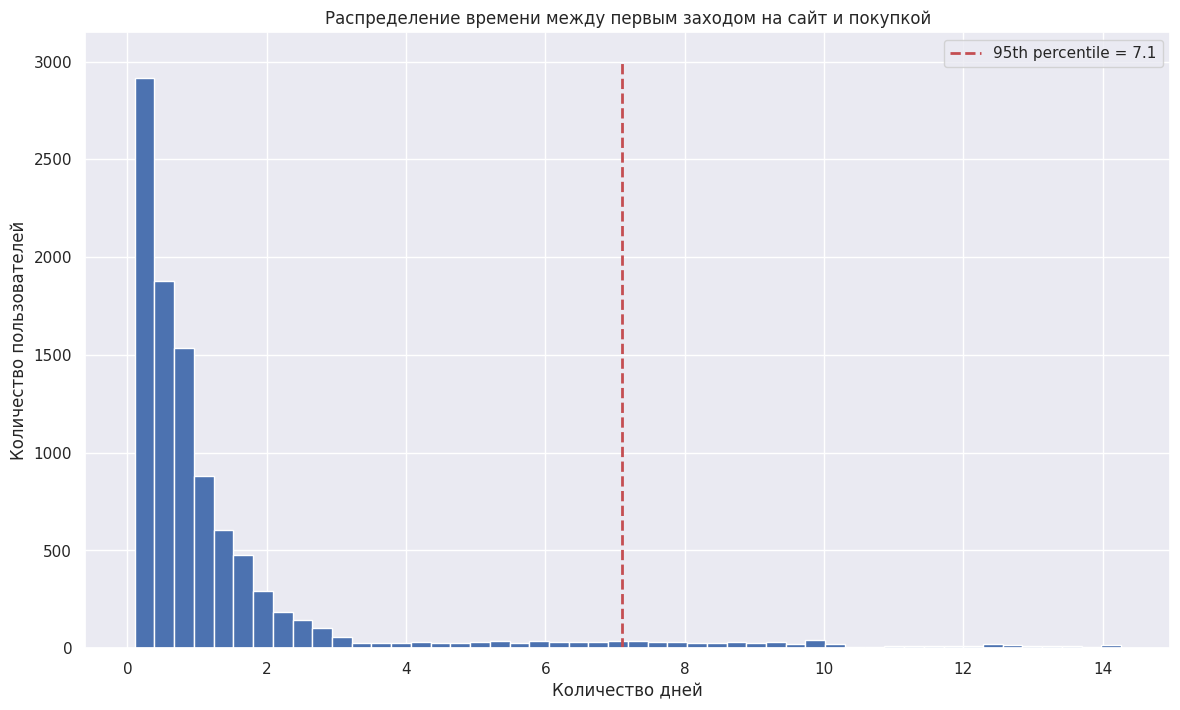

In [ ]:
plt.hist(historical_data['time_to_order'], bins=50)
plt.vlines(percentile_95, ymin=0, ymax=3000, linewidth=2,
           linestyle='dashed', color='r',
           label=f'95th percentile = {percentile_95}')
plt.title('Распределение времени между первым заходом на сайт и покупкой')
plt.xlabel('Количество дней')
plt.ylabel('Количество пользователей')
plt.legend()
plt.show()

## Задание 2. Исследуй распределение пользователей по группам по основным сегментам

**1. Прочитай файл bakery_ab_test.csv.**
   - Проверь, импортированы ли нужные тебе библиотеки.
   - Запиши данные в переменную `data`.
   - Назначь индекс аналогично первому заданию.

In [ ]:
# напиши здесь код
data = pd.read_csv('bakery_ab_test.csv', index_col=0)
data.head()

,user_id,test_group,purchase_amount,geo_group,acquisition_channel,within_window,platform
1,3738,test,306.639511,regions,target_direct,1,pc
2,3755,control,NaN,regions,target_direct,0,pc
3,3772,test,NaN,regions,context_brand,0,mobile
4,3789,control,NaN,spb,target_direct,0,pc
5,3806,test,NaN,regions,social_media,0,pc


**2. Напиши функцию plot_segment_distribution, чтобы проверить распределение пользователей по сегментам внутри каждой группы.**
   - Аргументами функции должны быть данные теста, колонки с сегментами (маркетинг, гео и платформа), тест-фактор.
   - Для каждого сегмента в функции агрегируй данные, посчитав по для каждой группы и сегмента количество пользователей.
   - Сбрость индекс.
   - Добавь в функцию построение столбиковой диаграммы (bar chart).

In [ ]:
# напиши здесь код
def plot_segments_distribution(df, segment_columns, test_factor):
    for segment in segment_columns:
        agg_data = df.groupby(by = ['test_group', segment],
                   as_index=False).agg({'user_id': 'count'})
        sns.catplot(data = agg_data, x = segment, y = 'user_id',
                    hue = test_factor, kind = 'bar', aspect = 1.5)

**3. Вызови функцию и посмотри на графики. Какой вывод о качестве сплитования ты можешь сделать?**
    — Передай списком столбцы, в которых обозначены сегменты пользователей, и отдельно столбец с тест-фактором.

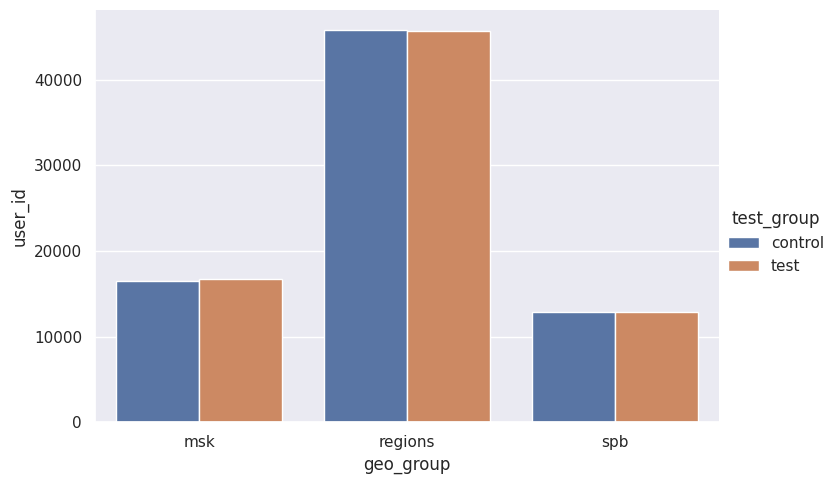

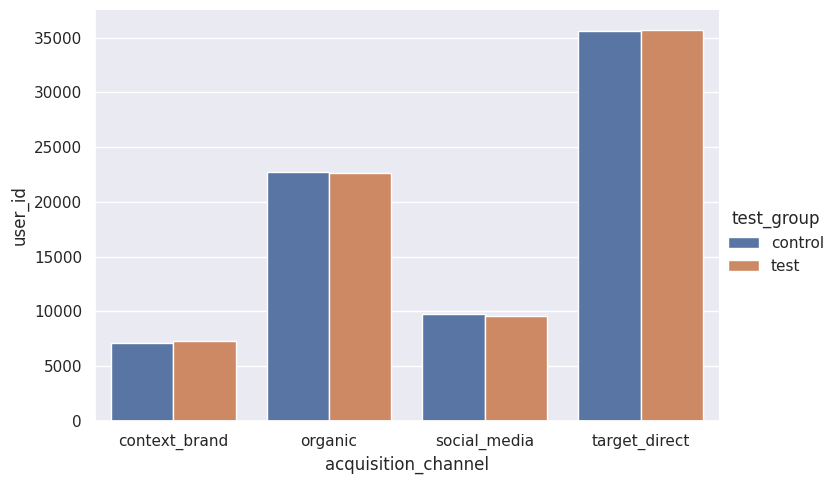

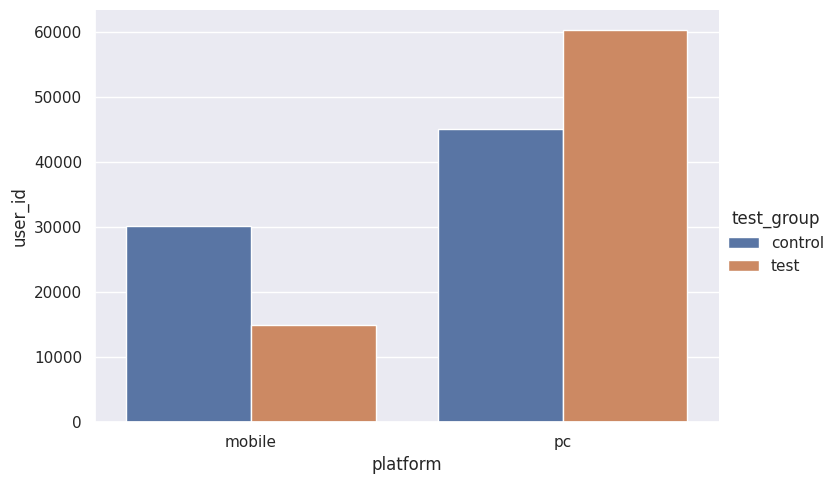

In [ ]:
# напиши здесь код
plot_segments_distribution(data, segment_columns = ['geo_group',
                                  'acquisition_channel', 'platform'],
                            test_factor = 'test_group')

неравномерное распределение пользователей по используемой платформе

## Задание 3. Используй критерий Хи-квадрат для конверсии


В прошлом задании ты, скорее всего, столкнулся с неравномерным распределением пользователей. Раньше мы просто перезапускали тест, чтобы собрать данные, но сейчас тест уже завершен, так что нам нужно анализировать те данные, которые есть. Мы не можем исправить данные, но можем проанализировать общие результаты и сравнить их с результатами для пользователей, зашедших с разных платформ, чтобы уменьшить риск принятия ошибочного решения. Поэтому дальше мы будем анализировать параллельно 3 теста:

1. Все пользователи, попавшие в тест
2. Пользователи, заходившие с ПК `platform = 'pc'`
3. Пользователи, заходившие с мобильного `platform = 'mobile'`

**Создай для каждой из 3 групп теста отдельную таблицу с метриками**
   - общее количество пользователей 'user_id': 'count'
   - количество покупок в окне конверсии 'within_window': 'sum'
   - средняя сумма покупки 'purchase_amount':'mean'
   - конверсия (количество покупок в окне конверсии / общее количество пользователей или среднее по полю `within_window`)

*Для фильтрации нужных пользователей можешь использовать* `loc[ ]`


In [ ]:
metrics = data.groupby('test_group', as_index=False).agg({'user_id': 'count',
                                                          'within_window': 'sum',
                                                          'purchase_amount': 'mean'})
metrics['conversion'] = round(100 * metrics['within_window'] / metrics['user_id'], 2)
metrics

,test_group,user_id,within_window,purchase_amount,conversion
0,control,75210,22998,5170.864335,30.58
1,test,75273,24427,5394.771589,32.45


In [ ]:
pc_metrics = data.loc[data['platform'] == 'pc'].groupby('test_group', as_index=False).agg({'user_id': 'count',
                                                          'within_window': 'sum',
                                                          'purchase_amount': 'mean'})
pc_metrics['conversion'] = round(100 * pc_metrics['within_window'] / pc_metrics['user_id'], 2)
pc_metrics

,test_group,user_id,within_window,purchase_amount,conversion
0,control,45112,13732,5200.121803,30.44
1,test,60317,19659,5401.003720,32.59


In [ ]:
mobile_metrics = data.loc[data['platform'] == 'mobile'].groupby('test_group', as_index=False).agg({'user_id': 'count',
                                                          'within_window': 'sum',
                                                          'purchase_amount': 'mean'})
mobile_metrics['conversion'] = round(100 * mobile_metrics['within_window'] / mobile_metrics['user_id'], 2)
mobile_metrics

,test_group,user_id,within_window,purchase_amount,conversion
0,control,30098,9266,5127.505438,30.79
1,test,14956,4768,5369.075812,31.88


**1. Вычисли** `p-value` **для каждой группы с помощью теста хи-квадрат**

   - Импортируй библиотеку `statsmodels` и используй функцию `proportions_chisquare` из нее
   - Результат работы функции `proportions_chisquare` присвой трем переменным для каждой группы


In [ ]:
import statsmodels.stats.proportion as proportion

In [ ]:
_, pval, _ = proportion.proportions_chisquare(metrics['within_window'],
                                              metrics['user_id'])
_, pc_pval, _ = proportion.proportions_chisquare(pc_metrics['within_window'],
                                                 pc_metrics['user_id'])
_, mobile_pval, _ = proportion.proportions_chisquare(mobile_metrics['within_window'],
                                                     mobile_metrics['user_id'])

**2. Введи в анализ уровень значимости в 5% с помощью переменной** `alpha`.


In [ ]:
# напиши здесь код
alpha = 0.05

print(f'Rejection of H0 for all users is {pval < alpha}')
print(f'Rejection of H0 for pc users is {pc_pval < alpha}')
print(f'Rejection of H0 for mobile users is {mobile_pval < alpha}')

Rejection of H0 for all users is True
Rejection of H0 for pc users is True
Rejection of H0 for mobile users is True


**3. Оставь комментарий, какой вывод о наличии статистически значимой в каждой группе разницы можно сделать? Что делаем с нулевой гипотезой?**

В каждой группе существует статистически значимая разница, отвергаем нулевую гипотезу о том, что разницы нет

## Задание 4. Вычисли мощность теста

1. Импортируй объект `stats.power` из библиотеки `statsmodels`
2. Присвой функцию `GofChisquarePower()` из этой библиотеки в переменную `chipower`
3. Реализуй функцию для подсчета `effect_size`

In [ ]:
# напиши здесь код
import statsmodels.stats.power as smp

chipower = smp.GofChisquarePower()

`effect_size` — это та самая наблюдаемая разница между двумя вариантами. Вычисляется следующим образом:

$$ES = \sqrt{(p_0 - p_1)^2/p_o}$$

, где под $p_0$ можно понимать конверсию в контрольной группе, а $p_1$ — тестовой

In [ ]:
def chi2_effect_size(p0, p1):
    return np.sqrt((p0 - p1) ** 2 / p0)

4. Запиши значения конверсии в тестовой `conversion_test` и контрольной `conversion_control` группы в разные переменные
    - переведи серию в массив с помощью `.values[ ]`
    - раздели значения на 100, чтобы получить значения, а не %


5. Создай переменную nobs для количества наблюдений и запиши в нее значение меньшей группы

In [ ]:
metrics

,test_group,user_id,within_window,purchase_amount,conversion
0,control,75210,22998,5170.864335,30.58
1,test,75273,24427,5394.771589,32.45


In [ ]:
conversion_control = []
conversion_test = []
nobs = []

for metric in [metrics, pc_metrics, mobile_metrics]:
    conversion_control.append(metric['conversion'].values[0] / 100)
    conversion_test.append(metric['conversion'].values[1] / 100)
    nobs.append(min(metric['user_id']))


**6. Вызови функцию .solve_power и передай ей в аргументы**
    - effect_size
    - количество наблюдений меньшей группы
    - значение p-value
    - мощности присвой значение None

**7. Сделай анализ мощности для каждого сегмента, для которого делали тест хи-квадрат.**

Оставь комментарий, как ты оцениваешь мощность этого теста? Можно ли на основе таких показателей делать выводы?


In [ ]:
powers = []
pvals = [pval, pc_pval, mobile_pval]

for i in range(3):
    powers.append(chipower.solve_power(effect_size = chi2_effect_size(conversion_control[i],
                                                                      conversion_test[i]),
                                       nobs = nobs[i],
                                       alpha = pvals[i],
                                       power = None))

print(f'general power = {round(powers[0] * 100, 2)}')
print(f'pc power = {round(powers[1] * 100, 2)}')
print(f'mobile power = {round(powers[2] * 100, 2)}')

general power = 92.71
pc power = 80.0
mobile power = 51.63


Значит, вероятности увидеть разницу (отклонить нулевую гипотезу) при условии что она существует - 92%, 80%, 51%. Мощность для мобильного сегмента слишком низкая и с вероятностью в 50% мы бы не увидели статистически значимых отличий там, где они существуют. Мощности в 92% и 80% достаточно велики и можно делать выводы о наличии стат значимости.

## Задание 5. Воспользуйся бутстрапом для оценки влияния теста на средний чек

**1. Сделай бутстрап среднего чека для тестовой и контрольной выборок, визуализируй результат. Какие выводы можно сделать?**
   - загрузи нужные модули из библиотеки `bootstrapped`
   - для сегментов, которые мы анализируем отдельно, создай переменную со значением среднего чека
   - чтобы убрать строки без покупок, используй `dropna()` и `.values`, чтобы перевести данные в формат массива

In [ ]:
# импортируем необходимые модули
!pip install -q bootstrapped
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare

  Preparing metadata (setup.py) ... done


In [ ]:
test = data[data['test_group'] == 'test']['purchase_amount'].dropna().values
control = data[data['test_group'] == 'control']['purchase_amount'].dropna().values

pc_test = data[(data['test_group'] == 'test') &
               (data['platform'] == 'pc')]['purchase_amount'].dropna().values
pc_control = data[(data['test_group'] == 'control') &
                  (data['platform'] == 'pc')]['purchase_amount'].dropna().values

mobile_test = data[(data['test_group'] == 'test') &
                   (data['platform'] == 'mobile')]['purchase_amount'].dropna().values
mobile_control = data[(data['test_group'] == 'control') &
                      (data['platform'] == 'mobile')]['purchase_amount'].dropna().values

**2. Вызови функцию `bootstrap_ab` для каждого сегмента, передай ей нужные аргументы**
   - `test = `
   - `ctrl = `
   - `stat_func = bs_stats.mean`
   - `compare_func = bs_compare.difference`
   - `return_distribution = True`

In [ ]:
boot_results = bs.bootstrap_ab(test = test, ctrl = control,
                               stat_func = bs_stats.mean,
                               compare_func = bs_compare.difference,
                               return_distribution = True)

pc_boot_results = bs.bootstrap_ab(test = pc_test, ctrl = pc_control,
                                  stat_func = bs_stats.mean,
                                  compare_func = bs_compare.difference,
                                  return_distribution = True)

mobile_boot_results = bs.bootstrap_ab(test = mobile_test, ctrl = mobile_control,
                                      stat_func = bs_stats.mean,
                                      compare_func = bs_compare.difference,
                                      return_distribution = True)

**3. Задай размер доверительного интервала для каждого исследуемого сегмента 95% с помощью перцентилей**

In [ ]:
borders = np.percentile(boot_results, [2.5, 97.5])
pc_borders = np.percentile(pc_boot_results, [2.5, 97.5])
mobile_borders = np.percentile(mobile_boot_results, [2.5, 97.5])

**4. Оцени, есть ли статистически значимое изменение по среднему чеку в каждом сегменте**

   - Построй гистограмму распределения значений среднего чека.
   - Выведи границы доверительного интервала линиями.
   - Выведи ноль красной линией.
   - Оставь комментарий, есть ли статистически значимое изменение по среднему чеку в каждом сегменте.


In [ ]:
from matplotlib import gridspec

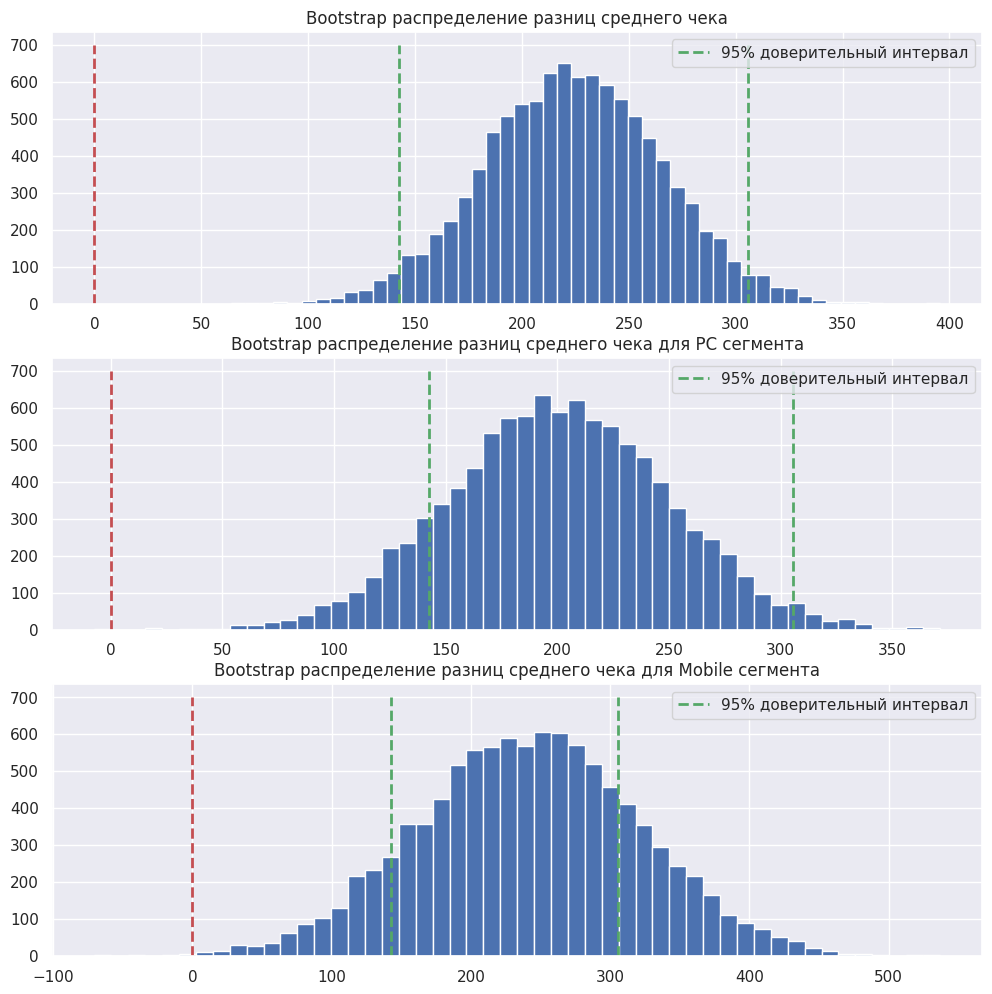

In [ ]:
fig, gs = plt.figure(figsize=(12,12)), gridspec.GridSpec(3, 1)
ax = []
results = [boot_results, pc_boot_results, mobile_boot_results]

for i in range(3):
    ax.append(fig.add_subplot(gs[i]))
    ax[i].hist(results[i], bins = 50)
    ax[i].vlines(borders, ymin = 0, ymax = 700, linestyle='dashed',
           linewidth = 2, color = 'g', label = '95% доверительный интервал')
    ax[i].vlines(0, ymin = 0, ymax = 700, linestyle='dashed',
           linewidth = 2, color = 'r')
    if i == 0:
        ax[i].set_title('Bootstrap распределение разниц среднего чека')
    if i == 1:
        ax[i].set_title('Bootstrap распределение разниц среднего чека для PC сегмента')
    if i == 2:
        ax[i].set_title('Bootstrap распределение разниц среднего чека для Mobile сегмента')
    ax[i].legend()

В каждом сегменте обнаружено статистически значимое изменение по среднему чеку, поскольку 0 не входит в 95% доверительный интервал

## Задание 6. Сделай вывод по результатам проведенного теста (заданий 2–5)

Нужно ли внедрять изменение каталога? Почему?

Нужно внедрять изменение каталога, поскольку обнаружено статистически значимое изменение конверсии и среднего чека.